In [12]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")
sns.set_palette('colorblind')

In [13]:
from generate_corpora import corpus_from_json
from analysis import *

In [14]:
models = ['grnn', 'gpt2']
constructions = ['cleft', 'intro_topic', 'nointro_topic', 'tough']
all_island_effects = []
all_island_surprisals = []
for model in models:
    for construction in constructions:
        control_filename =  os.path.join("grammar_outputs", "experiment1", model, f"{construction}_grammar_c.json")
        island_filename =  os.path.join("grammar_outputs", "experiment1", model, f"{construction}_grammar_i.json")
        control_tuples = corpus_from_json(control_filename, is_tuples = True)
        island_tuples = corpus_from_json(island_filename, is_tuples = True)
        all_island_effects += island_effects_for_model(model, control_tuples, island_tuples, construction)
        all_island_surprisals += island_surprisals("control", control_tuples, model, construction)
        all_island_surprisals += island_surprisals("island", island_tuples, model, construction)


# wilcox et al analyses are in other notebook
all_island_surprisals = pd.DataFrame(all_island_surprisals)
effects = pd.DataFrame(all_island_effects)

In [15]:
grnn_cnp_control = corpus_from_json("grammar_outputs/wilcox_replication/island_cnp_obj_grnn.json", is_tuples = True)
grnn_cnp_island = corpus_from_json("grammar_outputs/wilcox_replication/island_cnp_that_grnn.json", is_tuples = True)
gpt2_cnp_control = corpus_from_json("grammar_outputs/wilcox_replication/island_cnp_obj_gpt2.json", is_tuples = True)
gpt2_cnp_island = corpus_from_json("grammar_outputs/wilcox_replication/island_cnp_that_gpt2.json", is_tuples = True)
grnn_cnp_island_effects = island_effects_for_model("grnn", grnn_cnp_control, grnn_cnp_island, "wh_movement")
gpt2_cnp_island_effects = island_effects_for_model("gpt2", gpt2_cnp_control, gpt2_cnp_island, "wh_movement")

In [16]:
construction_map = {
    "wh_movement": "Wh-Movement",
    "cleft": "Clefting",
    "intro_topic": "Topicalization with \n Intro",
    "nointro_topic": "Topicalization without \n Intro",
    "tough": "Tough Movement"
}
island_effects = pd.DataFrame(grnn_cnp_island_effects + gpt2_cnp_island_effects + all_island_effects)

island_effects["construction"] = island_effects['construction'].apply(lambda const: construction_map[const])


Text(0.5, 1.05, 'GPT2 Filler Effects')

<Figure size 4000x2200 with 0 Axes>

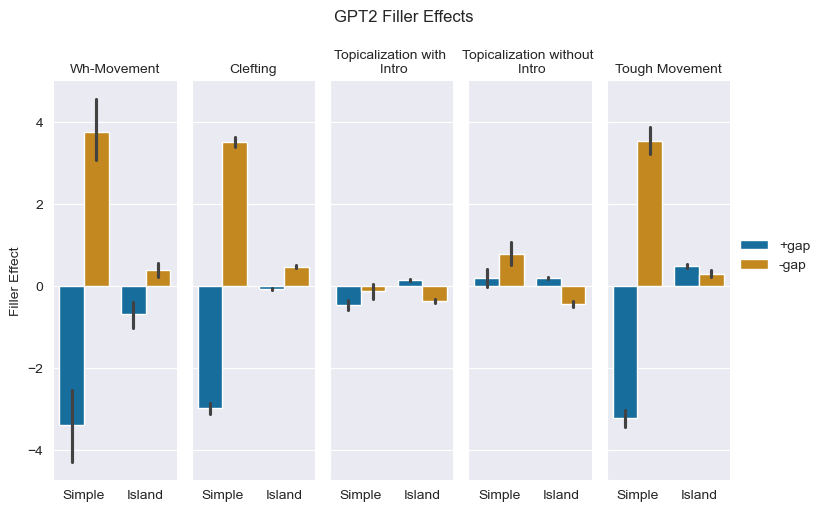

In [9]:
gpt2 = island_effects[island_effects['model'] == 'gpt2']
plt.figure(figsize=(40, 22))
g = sns.catplot(x="condition", y="wh_effect", hue="gap", data=gpt2, kind="bar", col = "construction",
            estimator="mean", aspect = 0.3)
g.set_titles(template='{col_name}')
g.set_axis_labels("", "Filler Effect")
g.legend.set_title("")
plt.suptitle("GPT2 Filler Effects", y = 1.05)
#plt.savefig("figures/gpt2_expt1.png")

<Figure size 2400x1500 with 0 Axes>

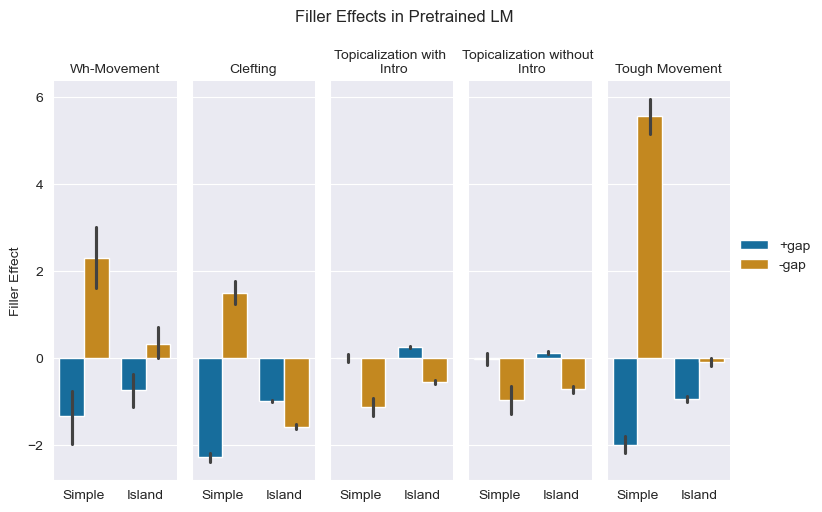

In [17]:
grnn = island_effects[island_effects['model'] == 'grnn']
plt.figure(figsize=(24, 15))
g = sns.catplot(x="condition", y="wh_effect", hue="gap", data=grnn, kind="bar", col = "construction",
            estimator="mean", aspect = 0.3)
g.set_titles(template='{col_name}')
g.set_axis_labels("", "Filler Effect")
g.legend.set_title("")
plt.suptitle("Filler Effects in Pretrained LM", y = 1.05)
plt.savefig("figures/grnn_expt1.png")

In [22]:
grnn.to_csv("data/pretrained_island_effects.csv", index=False)

In [8]:
island_formula = "surprisal~wh*gap*island+(gap||item)"
effects = interaction_effects(island_formula, constructions, models, all_island_surprisals)

/Users/sathvik/anaconda3/envs/py39/lib/python3.9/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


Linear mixed model fit by REML [’lmerMod’]
Formula: surprisal~wh*gap*island+(gap||item)

Family: gaussian	 Inference: parametric

Number of observations: 19440	 Groups: {'item': 4374.0}

Log-likelihood: -47708.876 	 AIC: 95439.752

Random effects:

                 Name     Var    Std
item      (Intercept)  16.550  4.068
item.1            gap  22.888  4.784
Residual                1.918  1.385

No random effect correlations specified

Fixed effects:

Linear mixed model fit by REML [’lmerMod’]
Formula: surprisal~wh*gap*island+(gap||item)

Family: gaussian	 Inference: parametric

Number of observations: 19440	 Groups: {'item': 4374.0}

Log-likelihood: -47708.876 	 AIC: 95439.752

Random effects:

                 Name     Var    Std
item      (Intercept)  16.550  4.068
item.1            gap  22.888  4.784
Residual                1.918  1.385

No random effect correlations specified

Fixed effects:



/Users/sathvik/anaconda3/envs/py39/lib/python3.9/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


Linear mixed model fit by REML [’lmerMod’]
Formula: surprisal~wh*gap*island+(gap||item)

Family: gaussian	 Inference: parametric

Number of observations: 19440	 Groups: {'item': 4374.0}

Log-likelihood: -46311.256 	 AIC: 92644.513

Random effects:

                 Name     Var    Std
item      (Intercept)  18.136  4.259
item.1            gap  25.220  5.022
Residual                1.391  1.179

No random effect correlations specified

Fixed effects:

Linear mixed model fit by REML [’lmerMod’]
Formula: surprisal~wh*gap*island+(gap||item)

Family: gaussian	 Inference: parametric

Number of observations: 19440	 Groups: {'item': 4374.0}

Log-likelihood: -46311.256 	 AIC: 92644.513

Random effects:

                 Name     Var    Std
item      (Intercept)  18.136  4.259
item.1            gap  25.220  5.022
Residual                1.391  1.179

No random effect correlations specified

Fixed effects:



/Users/sathvik/anaconda3/envs/py39/lib/python3.9/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


Linear mixed model fit by REML [’lmerMod’]
Formula: surprisal~wh*gap*island+(gap||item)

Family: gaussian	 Inference: parametric

Number of observations: 6480	 Groups: {'item': 1458.0}

Log-likelihood: -15435.064 	 AIC: 30892.128

Random effects:

                 Name     Var    Std
item      (Intercept)  18.811  4.337
item.1            gap  26.363  5.135
Residual                1.344  1.159

No random effect correlations specified

Fixed effects:

Linear mixed model fit by REML [’lmerMod’]
Formula: surprisal~wh*gap*island+(gap||item)

Family: gaussian	 Inference: parametric

Number of observations: 6480	 Groups: {'item': 1458.0}

Log-likelihood: -15435.064 	 AIC: 30892.128

Random effects:

                 Name     Var    Std
item      (Intercept)  18.811  4.337
item.1            gap  26.363  5.135
Residual                1.344  1.159

No random effect correlations specified

Fixed effects:



/Users/sathvik/anaconda3/envs/py39/lib/python3.9/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


Linear mixed model fit by REML [’lmerMod’]
Formula: surprisal~wh*gap*island+(gap||item)

Family: gaussian	 Inference: parametric

Number of observations: 9720	 Groups: {'item': 2187.0}

Log-likelihood: -24760.734 	 AIC: 49543.469

Random effects:

                 Name     Var    Std
item      (Intercept)  14.560  3.816
item.1            gap  21.689  4.657
Residual                2.815  1.678

No random effect correlations specified

Fixed effects:

Linear mixed model fit by REML [’lmerMod’]
Formula: surprisal~wh*gap*island+(gap||item)

Family: gaussian	 Inference: parametric

Number of observations: 9720	 Groups: {'item': 2187.0}

Log-likelihood: -24760.734 	 AIC: 49543.469

Random effects:

                 Name     Var    Std
item      (Intercept)  14.560  3.816
item.1            gap  21.689  4.657
Residual                2.815  1.678

No random effect correlations specified

Fixed effects:



/Users/sathvik/anaconda3/envs/py39/lib/python3.9/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


Linear mixed model fit by REML [’lmerMod’]
Formula: surprisal~wh*gap*island+(gap||item)

Family: gaussian	 Inference: parametric

Number of observations: 19440	 Groups: {'item': 4374.0}

Log-likelihood: -42654.238 	 AIC: 85330.477

Random effects:

                 Name     Var    Std
item      (Intercept)  10.641  3.262
item.1            gap  10.672  3.267
Residual                1.208  1.099

No random effect correlations specified

Fixed effects:

Linear mixed model fit by REML [’lmerMod’]
Formula: surprisal~wh*gap*island+(gap||item)

Family: gaussian	 Inference: parametric

Number of observations: 19440	 Groups: {'item': 4374.0}

Log-likelihood: -42654.238 	 AIC: 85330.477

Random effects:

                 Name     Var    Std
item      (Intercept)  10.641  3.262
item.1            gap  10.672  3.267
Residual                1.208  1.099

No random effect correlations specified

Fixed effects:



/Users/sathvik/anaconda3/envs/py39/lib/python3.9/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


Linear mixed model fit by REML [’lmerMod’]
Formula: surprisal~wh*gap*island+(gap||item)

Family: gaussian	 Inference: parametric

Number of observations: 19440	 Groups: {'item': 4374.0}

Log-likelihood: -42389.975 	 AIC: 84801.950

Random effects:

                 Name    Var    Std
item      (Intercept)  8.595  2.932
item.1            gap  9.045  3.007
Residual               1.318  1.148

No random effect correlations specified

Fixed effects:

Linear mixed model fit by REML [’lmerMod’]
Formula: surprisal~wh*gap*island+(gap||item)

Family: gaussian	 Inference: parametric

Number of observations: 19440	 Groups: {'item': 4374.0}

Log-likelihood: -42389.975 	 AIC: 84801.950

Random effects:

                 Name    Var    Std
item      (Intercept)  8.595  2.932
item.1            gap  9.045  3.007
Residual               1.318  1.148

No random effect correlations specified

Fixed effects:



/Users/sathvik/anaconda3/envs/py39/lib/python3.9/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


Linear mixed model fit by REML [’lmerMod’]
Formula: surprisal~wh*gap*island+(gap||item)

Family: gaussian	 Inference: parametric

Number of observations: 6480	 Groups: {'item': 1458.0}

Log-likelihood: -14120.654 	 AIC: 28263.308

Random effects:

                 Name    Var    Std
item      (Intercept)  8.386  2.896
item.1            gap  8.670  2.944
Residual               1.339  1.157

No random effect correlations specified

Fixed effects:

Linear mixed model fit by REML [’lmerMod’]
Formula: surprisal~wh*gap*island+(gap||item)

Family: gaussian	 Inference: parametric

Number of observations: 6480	 Groups: {'item': 1458.0}

Log-likelihood: -14120.654 	 AIC: 28263.308

Random effects:

                 Name    Var    Std
item      (Intercept)  8.386  2.896
item.1            gap  8.670  2.944
Residual               1.339  1.157

No random effect correlations specified

Fixed effects:



/Users/sathvik/anaconda3/envs/py39/lib/python3.9/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


Linear mixed model fit by REML [’lmerMod’]
Formula: surprisal~wh*gap*island+(gap||item)

Family: gaussian	 Inference: parametric

Number of observations: 9720	 Groups: {'item': 2187.0}

Log-likelihood: -22624.102 	 AIC: 45270.204

Random effects:

                 Name     Var    Std
item      (Intercept)   4.177  2.044
item.1            gap  12.552  3.543
Residual                2.435  1.560

No random effect correlations specified

Fixed effects:

Linear mixed model fit by REML [’lmerMod’]
Formula: surprisal~wh*gap*island+(gap||item)

Family: gaussian	 Inference: parametric

Number of observations: 9720	 Groups: {'item': 2187.0}

Log-likelihood: -22624.102 	 AIC: 45270.204

Random effects:

                 Name     Var    Std
item      (Intercept)   4.177  2.044
item.1            gap  12.552  3.543
Residual                2.435  1.560

No random effect correlations specified

Fixed effects:



Here, we're looking for negative interaction terms for the filler and gap, which shows the presence of *basic* licensing. If that's present, we look at the 3-way interaction between filler, gap, and island. This should be positive. 

In [9]:
pd.DataFrame(effects).reset_index()[['interaction_type', 'Estimate', 'P-val', 'model', 'condition']]

,interaction_type,Estimate,P-val,model,condition
0,filler_gap,-3.788,0.000,grnn,cleft
1,island_filler_gap,4.381,0.000,grnn,cleft
2,filler_gap,1.120,0.000,grnn,intro_topic
3,island_filler_gap,-0.325,0.004,grnn,intro_topic
4,filler_gap,0.936,0.000,grnn,nointro_topic
5,island_filler_gap,-0.099,0.607,grnn,nointro_topic
6,filler_gap,-7.547,0.000,grnn,tough
7,island_filler_gap,6.701,0.000,grnn,tough
8,filler_gap,-6.490,0.000,gpt2,cleft
9,island_filler_gap,5.952,0.000,gpt2,cleft
